# Hiring Demographics

An analysis of gendered hiring patterns. Look at the average time between getting a PhD and getting hired into a faculty position. 

**Research Question**: Are women hired more quickly than men? Given the recent push towards increased diversity, women may be hired at a faster rate out of graduate school.


**Sample**: Use the listings on the Astrophysics Rumor Mill as a representative sample of people that have been hired over the past few years. Exclusively use rumors with confirmed names. While this an incomplete list of people hired over the past few years, it is likely representative. Use 2010-2011 through 2016-2017 years. PhD year for each person on the list was determined from a google search (usually listed in a CV, or on the faculty webpage). For the year that the person was hired, use the latter year of the rumor mill (ie. for names on the 2010-2011, the year hired is 2011). Do not consider when they actually started the faculty job; the focus is on the hiring process, and in that case the year someone was hired is more important. 

When googling for the PhD year, record the gender of the astronomer. This assumes a binary gender, and evaluates gender strictly based on how they present in an available photo. This marginalizes non-binary gender individuals... It is a simplifying assumption.


I exclude people who got a PhD before 2000. Most of the people in this range previously worked at a national lab (e.g. JPL) before being hired into a faculty position. Given the hypothesis, this is a reasonable assumption.

This leaves a total sample size of 245 people, 157 men, 88 women.

In [1]:
%run plot_demo

 
Mean time to hiring: 4.90+-0.31


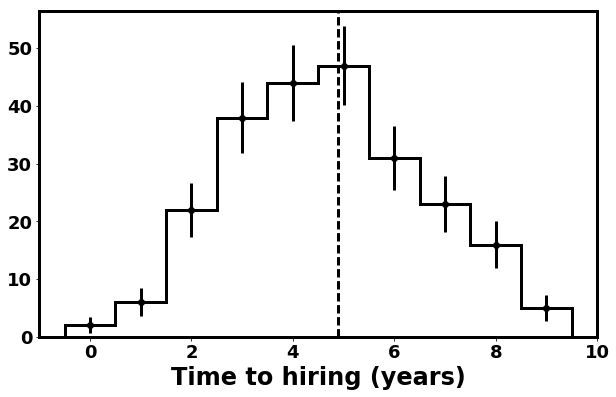

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,6)
plot_demo(full=True)

Over the entire distribution, the mean time to hiring is 4.90$\pm$0.31

 
Time to faculty, Men: 5.31+-0.42
Time to faculty, Female: 4.16+-0.44 
Prob: 0.034


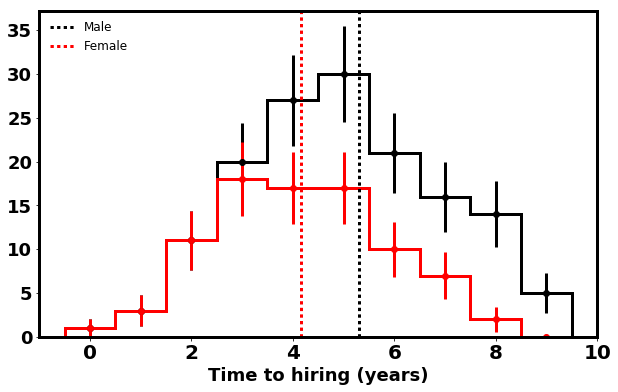

In [3]:
plot_demo()

There is a significant difference in the gendered distributions. Women are hired on average 4.16$\pm$0.44 years out of graduate school, while men are hired on average 5.31$\pm$0.42 years out of grad school. A KS test indicates a significant difference in these distribution at p<0.05 (p=0.034). 

## Models:

There are multiple possible explanations for why the genedered distributions could differ. We examine each in turn, using a basic model framework. We generate a labor pool, filled with 30,000 people per year, a fraction of which ($ffrac$) are women. In the fiducial model $ffrac=0.3$, but we consider variations on this fraction in some of the models. The labor pool is populated starting in 2000 and ending in 2017. The year in which someone enters the labor pool is recorded as the year in which they received their PhD.

Once the labor pool is defined, people are randomly selected from this labor pool to define the pool of people that are hired into faculty jobs. Starting in 2011 and going through 2017, 10,000 people are hired from the labor pool. Once a person is hired in a given year they are removed from the labor pool so that they are not hired in subsequent years. 

The number of people entering the labor pool and hired each year is much, much larger than the entire field of astronomy, but is choosen to minimizing sampling error in the model. The relative proportional of labor pool to job pool size is chosen to match recent statistics. The AIP (2014) reports ~150 PhDs awarded per year from 2007 to 2012. In the Rumor Mill, roughly 50 faculty jobs are listed per year (while the listings of confirmed rumors among the Rumor Mill is incomplete, the total listing of jobs is close to complete). I have maintained this 3:1 PhD to faculty position ratio in the models. 

In order to match the observed distribution the likelihood for being hired needs to vary depending on how long someone has been out of graduate school. A smaller fraction of astronomers are hired immediately after graduating, and after being on the labor market for 8 years, than those on the labor market for 5 years. This may be due to a number of factors, including a preference to hire astronomers a few years out of graduate school, and people that have been on the labor market for many years leaving the labor pool. We don't distinguish between these two scenarios for basic model. When looking at gendered differences, we consider differences in the rate at which astronomers leave the labor pool.

In our models, we allow the probability of being hired as a function of number of years after graduate school as free parameter. We also exclude anyone that has been on the labor market for more than 10 years (to match our selection effect on the observed sample).

Our basic model is shown below

 
Mean time to hiring: 4.90+-0.31
 
Mean time to hiring (model): 4.73


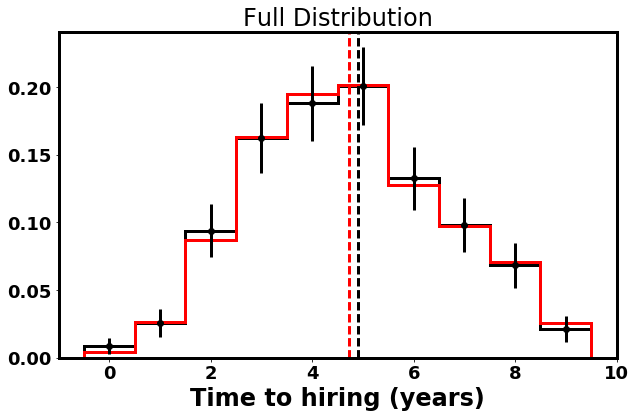

In [19]:
basic_model(success=[.01,.06,.2,.4,.53,.60,.4,.3,.21,.07])
plt.title('Full Distribution',fontsize=24)

 
Mean time to hiring: 5.31+-0.42
 
Mean time to hiring (model): 5.00


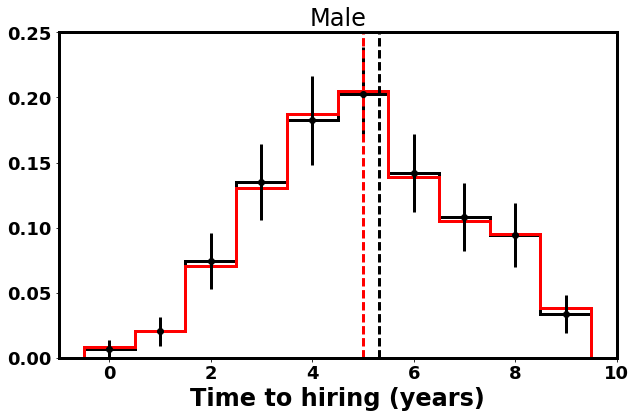

In [20]:
basic_model(success=[.02,.05,.18,.35,.54,.65,.46,.35,.31,.12],male_only=True)
plt.title('Male',fontsize=24)

 
Mean time to hiring: 4.16+-0.44
 
Mean time to hiring (model): 4.12


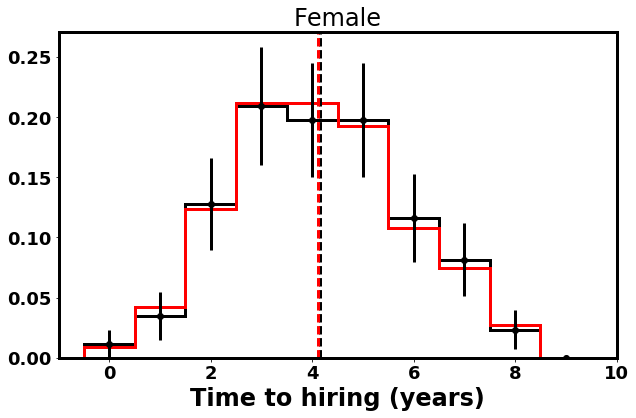

In [17]:
basic_model(success=[.02,.1,.3,.57,.63,.63,.36,.24,.08,.00],female_only=True)
plt.title('Female',fontsize=24)

## Gendered Models

We next turn to explaining the difference in the distributions between men and women. We consider a number of different methods to bias the distributions:
- Increase in the number of women with time.
- A higher rate of hiring for women than men.  
- Women leaving the labor pool more quickly than men.

Our metrics for evaluating the feasability of a model are the ability to match the distributions of hiring times for both men and women, as well as the survival statistics from Hughes et al. 2014. In the survival statistics they compare the fraction of female graduate students in 2003 to the fraction of female assistant professors in 2013. Assuming no attrition of women from the labor market, these two fractions would be the same, but instead there is a significant decrease from 30$\pm$2% in 2003 to 26$\pm$4% in 2013. In comparing to the distributions and survival statistics we do not use any statistical measures (e.g. $\chi^2$), but instead use a more informal 'chi-by-eye'. Our models are meant to be illustrative rather than definitive.

### Model 1: Changing Demographics 

The first model we consider is one in which the fraction of women within astronomy increases with time. Between 1992 and 2013 the fraction of female graduate students rose from 22% to 34%, while the fraction of female assistant professors increased from 17% to 26% over the same period(Hughes et al. 2014). Adding substantially more young women to the labor pool will bias the hiring distribution towards shorter times.

To model this we implement a linear change in the fraction of women with time. We assume that 74% of PhDs in 2000 are awarded to men, based on the 26% female fraction measured in 1999 (Hughes et al. 2014). 

%Female 2003 grad students (30pm2%): 0.55
%Female Assistant Prof 2013 (26pm4%): 0.58


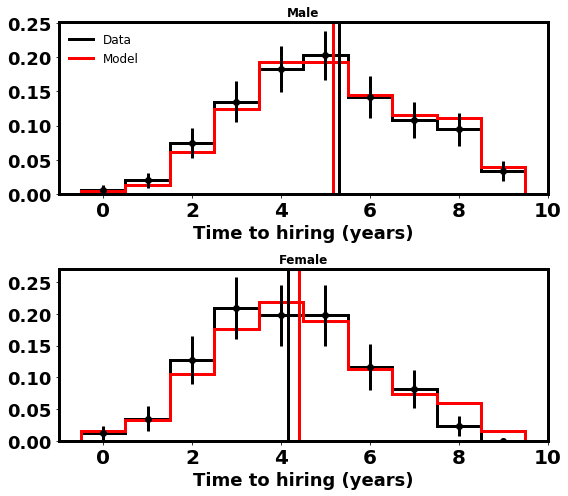

In [21]:
plt.rcParams['figure.figsize']=(8,7)
gendered_model1([.03,.07,.25,.45,.63,.60,.39,.28,.23,.07],slope=.045)
plt.tight_layout()

Our best fit comes with slope of 0.045. This implies an increase in the fraction of women obtaining PhDs in astronomy of 4.5 percentage points per year. This is demonstrably False, because it implies that in 2017 only 2% of PhDs in astronomy are obtained by men, which is inconsistent with measured demographics. This model also predicts that more than half of assistant professors in 2013 were women, which is also inconsistent with demographics.

We can attempt a more realistic slope of .005. The results of this model (shown below) demonstrate that the change in gender demographics has little effect on the overall distribution. It does not produce a distribution for women that matches the observed hiring distribution, and it overestimates the fraction of female assistant professors in 2013. 

%Female 2003 grad students (30pm2%): 0.30
%Female Assistant Prof 2013 (26pm4%): 0.30


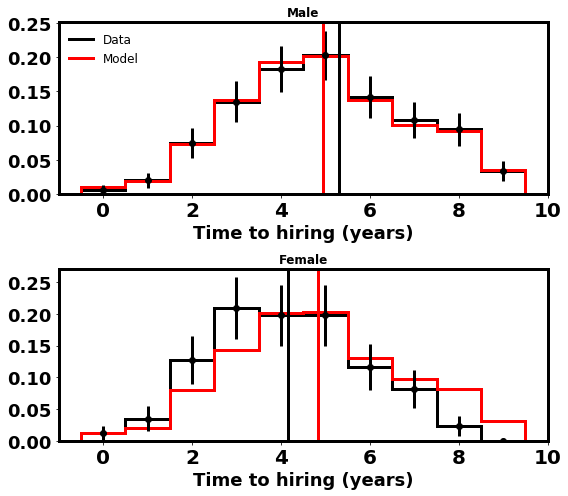

In [22]:
gendered_model1([.03,.05,.21,.39,.58,.62,.43,.32,.28,.10],slope=.006)
plt.tight_layout()

## Model 2: Hiring Bias

Our second model considers an intrinsic bias towards hiring women. This may occur as a result of diversity efforts leading more universities to hire women more quickly out of graduate school, or because women are intrinsically better qualified for faculty jobs and therefore are more successful on the job market. Given the finite number of women that receive a PhD each year, by removing women from the labor pool early on there are fewer women at later times, shifting the peak of hiring distribution towards shorter timescales.
    
We model this by including a *bias* parameter that is the increase in the probability of hiring a women relative to hiring a man (e.g *bias*=2 indicates that women are twice as likely to be hired as men). 

%Female 2003 grad students (30pm2%): 0.30
%Female Assistant Prof 2013 (26pm4%): 0.87


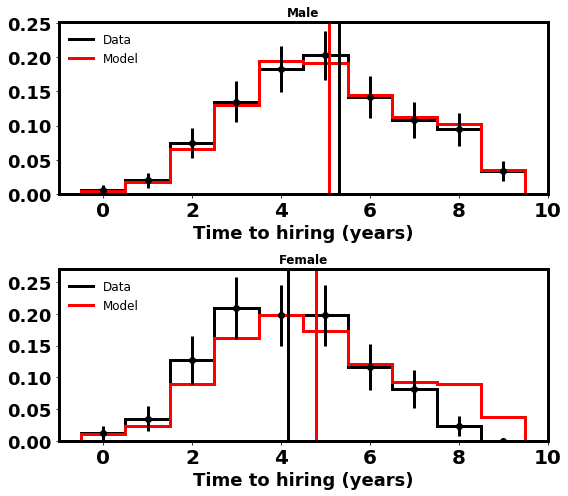

In [23]:
gendered_model2([.02,.05,.2,.4,.59,.61,.45,.34,.32,.12],bias=20)
plt.tight_layout()

As demonstrated above, even an extreme bias (20x higher probability of hiring a women than hiring a man) does not produce a distribution that matches the observed hiring distribution for women. It also strongly over-estimates the fraction of women among assistant professors. This is because there are enough women in the labor pool such that the labor pool does not become starved at later times.

While the number of astronomers that enter the labor pool each year (30,000) and the number that are hired (10,000) is much, much larger than the actual statistics, the relative proportion is realistic. According to the AIP, ~150 astronomers received PhDs per year between 2007 and 2012 (Mulvey & Nicholson 2012), while there are typically ~50 faculty job postings per year. By maintaining this proportion, but vastly increasing the number of people in the labor pool, we can accuratly characterize the model distribution with small sampling errors. 

We can consider a much more starved labor pool by increasing the number of astronomers hired into faculty positions each year. Even when increasing the number of astronomers hired per year, we still cannot match the observed hiring distribution, and over predict the percentage of female assistant professors. 

%Female 2003 grad students (30pm2%): 0.30
%Female Assistant Prof 2013 (26pm4%): 0.63


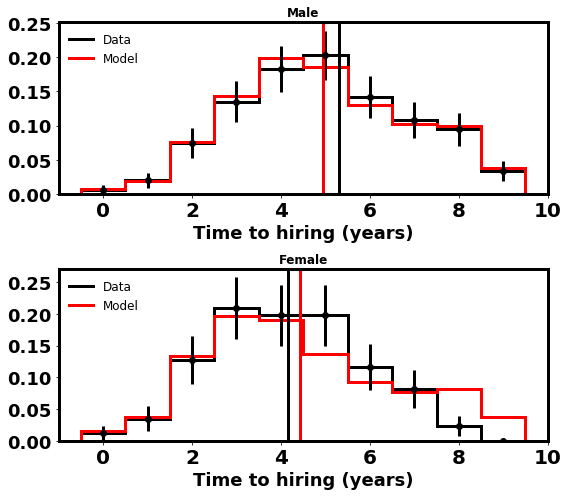

In [24]:
gendered_model2([.02,.05,.2,.4,.59,.61,.45,.34,.32,.12],bias=6,Nhire=25000)
plt.tight_layout()

## Model 3: Leaving the Labor Pool

The third model we consider is one in which astronomers leave the labor pool at a rate that increases with time. As is obvious to anyone that has gone through the process, applying to faculty jobs year after year can become demoralizing,  which can drive people away from faculty jobs. Some of the astronomers that leave the faculty labor market leave the field entirely, while some of them head into non-academic jobs, either at national research institutions (STSCI, etc), or outside of the field of astronomy. If women leave the labor market at a higher rate than men do, then this would starve the long timescale end of the distribution, leading to a sharper turnover in the distribution for women.

The probability of leaving is specified by an exponential with a characteristic timescale *$\tau$*. The timescale can differ between men and women, with a smaller timescale implying that a men/women leave the field at a faster rate. This exponential taper is applied starting 2 years after obtaining a PhD. 

%Female 2003 grad students (30pm2%): 0.30
%Female Assistant Prof 2013 (26pm4%): 0.23


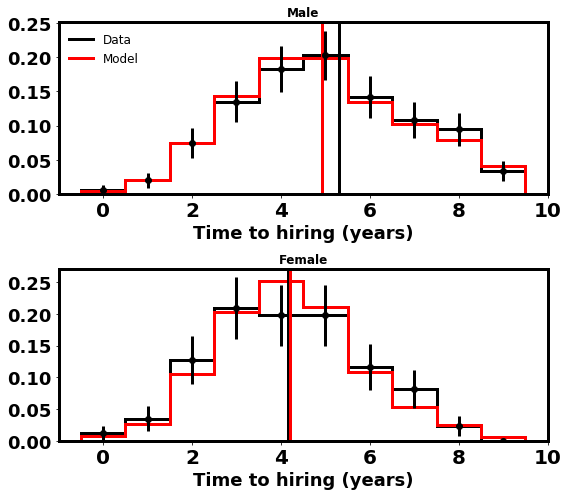

In [25]:
gendered_model3([.01,.04,.15,.3,.48,.64,.62,.75,1.,1.],tau_male=10.,tau_female=5.)
plt.tight_layout()

This model is able to successfully match both the male and female distribution with time, as well as the survival statistics. Within this model women leave the field at a rate that is roughly 60% higher than that of men (shown below). We caution that this model is not unique, nor is it likely to be the best fit. It is merely illustrative of one type of change in the labor market that is consistent with the data.

<string>:899: RuntimeWarning: invalid value encountered in divide


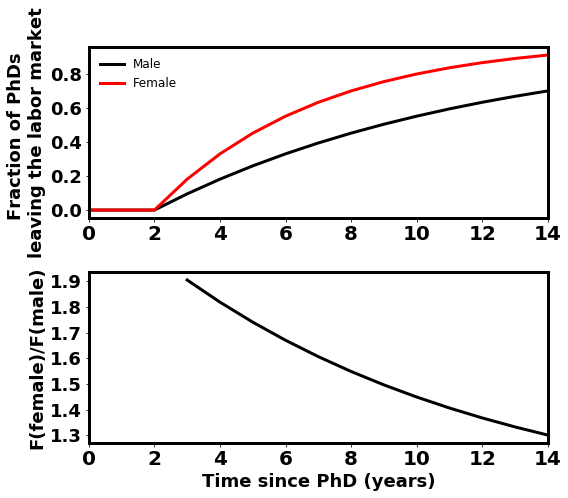

In [26]:
plot_df(10.,5.)
plt.tight_layout()

## Conclusions

We find that substantial differences exist between male and female astronomers. Men, on average, take a year longer than women to transition from being a graduate student to a faculty position. This difference is not due to changing demographics, or a bias towards hiring women, but is consistent with women leaving the labor market at a rate that is 60% higher than men. This depletion in the labor market at late times will bias the time to hiring for women towards faster transitions.

Joining a faculty position is simply one possible career path for PhD astronomers, and while it is the focus of this analysis, we do not mean to imply that the academic career path is the best possible career path. 

### References

- Hughes et al. 2014: Jan 2014 STATUS Newsletter, https://cswa.aas.org/status/Status_2014_Jan.pdf, ed: N. Morrison
- Mulvey & Nicholson 2014: AIP https://www.aip.org/sites/default/files/statistics/undergrad/enrolldegrees-a-12.3.pdf